## Installing required libraries

In [13]:
import numpy as np
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

## Creating objects for detecting and drawing pose

In [14]:
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, model_complexity=2)

I0000 00:00:1731662333.418446 2132359 gl_context.cc:357] GL version: 2.1 (2.1 ATI-6.1.13), renderer: AMD Radeon Pro 5300M OpenGL Engine


W0000 00:00:1731662333.596991 2198075 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1731662333.733231 2198075 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


## Live camera feed capturing

In [2]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    cv2.imshow('Mediapipe Feed', frame)     
    if cv2.waitKey(1): 
        cap.release()
        cv2.destroyAllWindows()

2024-11-13 12:36:25.667 Python[16287:1149196] +[IMKClient subclass]: chose IMKClient_Modern
2024-11-13 12:36:25.668 Python[16287:1149196] +[IMKInputSession subclass]: chose IMKInputSession_Modern


: 

# Mediapipe pose 

![Screenshot 2024-11-11 at 10.31.50 AM.png](<attachment:Screenshot 2024-11-11 at 10.31.50 AM.png>)
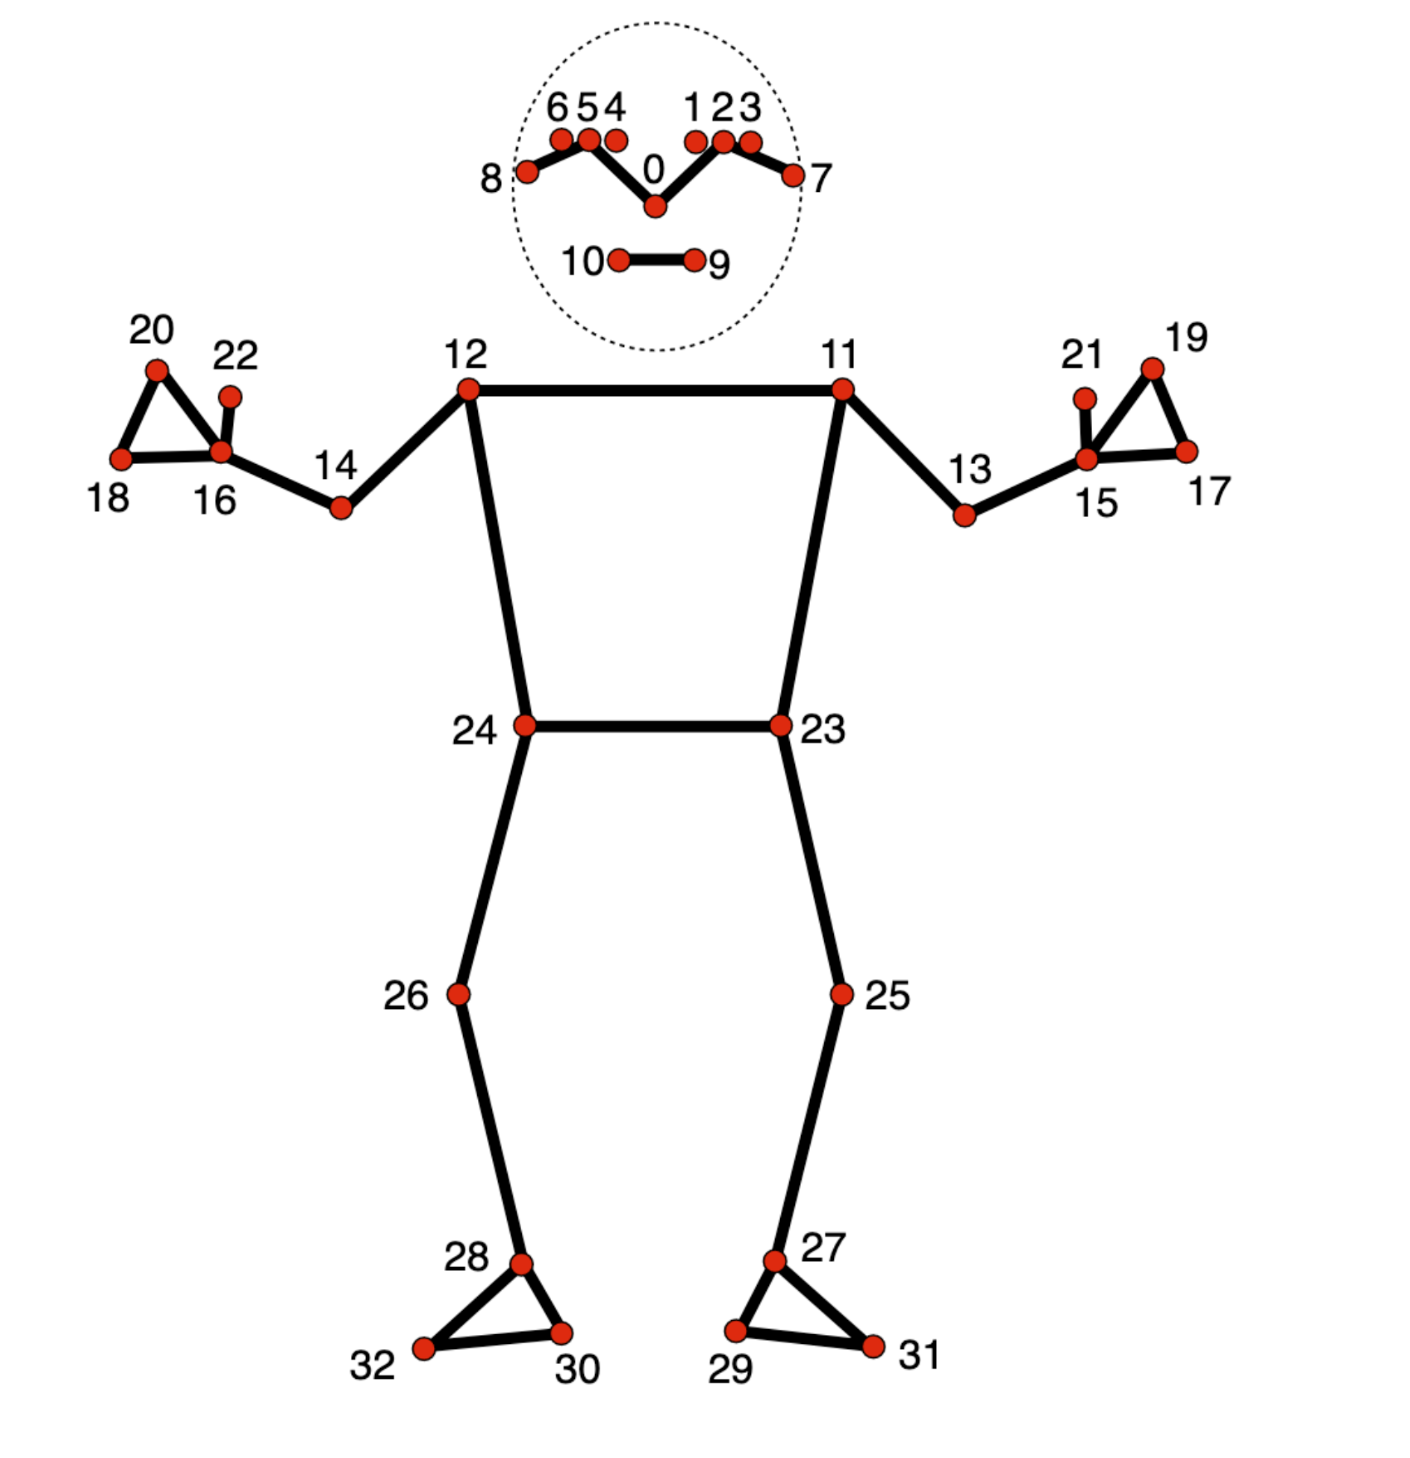

0 - nose  
1 - left eye (inner)  
2 - left eye  
3 - left eye (outer)  
4 - right eye (inner)  
5 - right eye  
6 - right eye (outer)  
7 - left ear  
8 - right ear  
9 - mouth (left)  
10 - mouth (right)  
11 - left shoulder  
12 - right shoulder  
13 - left elbow  
14 - right elbow  
15 - left wrist  
16 - right wrist  
17 - left pinky  
18 - right pinky  
19 - left index  
20 - right index  
21 - left thumb  
22 - right thumb  
23 - left hip  
24 - right hip  
25 - left knee  
26 - right knee  
27 - left ankle  
28 - right ankle  
29 - left heel  
30 - right heel  
31 - left foot index  
32 - right foot index  

## Key Point Detection from live feed

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    results = pose.process(frame_rgb)

    if results.pose_landmarks:
        mp_drawing.draw_landmarks(frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

    cv2.imshow("Yoga Pose Detection", frame)

    if cv2.waitKey(10) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()

## Key Point Detection from an image

W0000 00:00:1731662340.990769 2198077 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


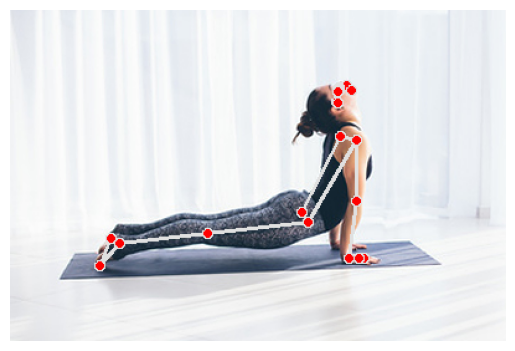

In [15]:
sample_img = cv2.imread('../data/sun_salutation_poses/test/Bhujangasana/16102003_2562.jpg')

results = pose.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))

img_copy = sample_img.copy()

if results.pose_landmarks:
    mp_drawing.draw_landmarks(image=img_copy, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)
    plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
    plt.axis('off')

In [16]:
results.pose_landmarks

landmark {
  x: 0.678246856
  y: 0.22930342
  z: 0.0114671765
  visibility: 0.999019861
}
landmark {
  x: 0.663858771
  y: 0.237549186
  z: 0.0320359953
  visibility: 0.998287618
}
landmark {
  x: 0.662812054
  y: 0.240495771
  z: 0.0317235142
  visibility: 0.998061836
}
landmark {
  x: 0.661925375
  y: 0.243432209
  z: 0.0318530239
  visibility: 0.998749852
}
landmark {
  x: 0.664313555
  y: 0.240729198
  z: -0.0128714778
  visibility: 0.99910754
}
landmark {
  x: 0.663294196
  y: 0.245778322
  z: -0.0133618638
  visibility: 0.999438345
}
landmark {
  x: 0.662104249
  y: 0.250870913
  z: -0.0136339404
  visibility: 0.99961555
}
landmark {
  x: 0.659913957
  y: 0.278881252
  z: 0.103699282
  visibility: 0.999019504
}
landmark {
  x: 0.660961628
  y: 0.282571256
  z: -0.104759082
  visibility: 0.999277771
}
landmark {
  x: 0.688654721
  y: 0.244598955
  z: 0.0405299179
  visibility: 0.999176681
}
landmark {
  x: 0.689093
  y: 0.246922836
  z: -0.0216645095
  visibility: 0.999144793
}
la

## Fetching specific key points

In [17]:
mp_pose.PoseLandmark.NOSE.value

0

In [18]:
index = 7

body_part_name = mp_pose.PoseLandmark(index).name
body_part_name

'LEFT_EAR'

In [19]:
points = mp_pose.PoseLandmark
for point in points:
    print(point, mp_pose.PoseLandmark(point).name)

0 NOSE
1 LEFT_EYE_INNER
2 LEFT_EYE
3 LEFT_EYE_OUTER
4 RIGHT_EYE_INNER
5 RIGHT_EYE
6 RIGHT_EYE_OUTER
7 LEFT_EAR
8 RIGHT_EAR
9 MOUTH_LEFT
10 MOUTH_RIGHT
11 LEFT_SHOULDER
12 RIGHT_SHOULDER
13 LEFT_ELBOW
14 RIGHT_ELBOW
15 LEFT_WRIST
16 RIGHT_WRIST
17 LEFT_PINKY
18 RIGHT_PINKY
19 LEFT_INDEX
20 RIGHT_INDEX
21 LEFT_THUMB
22 RIGHT_THUMB
23 LEFT_HIP
24 RIGHT_HIP
25 LEFT_KNEE
26 RIGHT_KNEE
27 LEFT_ANKLE
28 RIGHT_ANKLE
29 LEFT_HEEL
30 RIGHT_HEEL
31 LEFT_FOOT_INDEX
32 RIGHT_FOOT_INDEX


# Compare two poses based on distance

In [20]:
ideal_img = cv2.imread('../data/sun_salutation_poses/test/Bhujangasana/16102003_2564.jpg')
results = pose.process(cv2.cvtColor(ideal_img, cv2.COLOR_BGR2RGB))
ideal_keypoints = results.pose_landmarks

In [21]:
user_img = cv2.imread('../data/sun_salutation_poses/test/Bhujangasana/16102003_2562.jpg')
user_results = pose.process(cv2.cvtColor(user_img, cv2.COLOR_BGR2RGB))
user_keypoints = user_results.pose_landmarks

In [9]:
user_keypoints

landmark {
  x: 0.679974496
  y: 0.23012194
  z: -0.131044716
  visibility: 0.999592364
}
landmark {
  x: 0.66912359
  y: 0.23444286
  z: -0.0965582058
  visibility: 0.999408
}
landmark {
  x: 0.66857475
  y: 0.237054288
  z: -0.0965607464
  visibility: 0.999489903
}
landmark {
  x: 0.667681932
  y: 0.239897713
  z: -0.0964738
  visibility: 0.999618769
}
landmark {
  x: 0.668361425
  y: 0.235515714
  z: -0.137121409
  visibility: 0.999744236
}
landmark {
  x: 0.667579293
  y: 0.238883406
  z: -0.137108102
  visibility: 0.999762475
}
landmark {
  x: 0.666531503
  y: 0.242385328
  z: -0.137076363
  visibility: 0.99973613
}
landmark {
  x: 0.66268456
  y: 0.274212718
  z: 0.00520679401
  visibility: 0.999664903
}
landmark {
  x: 0.664137363
  y: 0.275495797
  z: -0.182821542
  visibility: 0.999614596
}
landmark {
  x: 0.685353458
  y: 0.248934656
  z: -0.0962100476
  visibility: 0.999633193
}
landmark {
  x: 0.684800386
  y: 0.249783352
  z: -0.149819016
  visibility: 0.999526262
}
landma

In [10]:
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics.pairwise import cosine_similarity

In [11]:
from dtaidistance import dtw

In [12]:
def compare_keypoint_distances(user_img, user_keypoints, ideal_keypoints):
    if user_keypoints and ideal_keypoints:
        feedback = {}
        threshold = 0.1
        temp_img = user_img.copy()
        for idx, landmark in enumerate(user_keypoints.landmark):
            ideal_landmark = ideal_keypoints.landmark[idx]
            # dist = np.linalg.norm(np.array([landmark.x, landmark.y]) - np.array([ideal_landmark.x, ideal_landmark.y]))  # euclidian distance
            # dist = cosine_similarity(np.array([landmark.x, landmark.y]).reshape(1, -1) - np.array([ideal_landmark.x, ideal_landmark.y]).reshape(1, -1)) # cosine similarity / cosine distance
            dist = dtw.distance(np.array([landmark.x, landmark.y]), np.array([ideal_landmark.x, ideal_landmark.y]))
            color = (0, 255, 0) if dist < threshold else (0, 0, 255) 
            feedback[idx] = color

        circle_radius = max(3, int(user_img.shape[0] * 0.01))
        for idx, landmark in enumerate(user_keypoints.landmark):
            x, y = int(landmark.x * user_img.shape[1]), int(landmark.y * user_img.shape[0])
            cv2.circle(temp_img, (x,y), circle_radius, feedback[idx], -1)

        return temp_img
    else:
        return 'Keypoints are not detected'


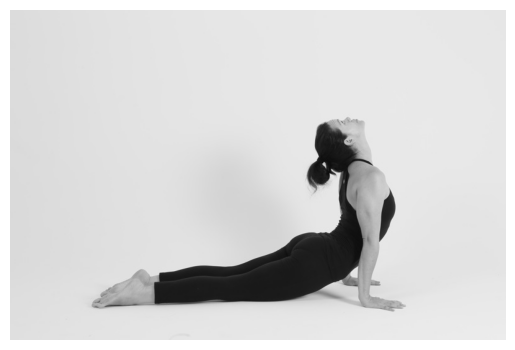

In [13]:
plt.imshow(cv2.cvtColor(ideal_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

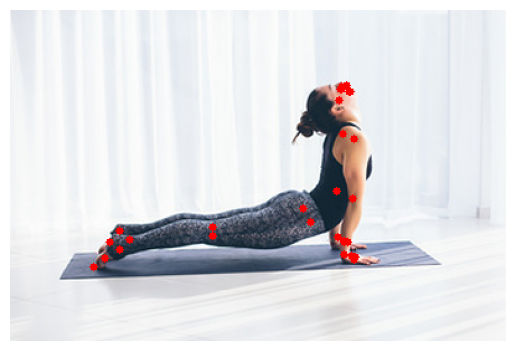

In [14]:
temp = compare_keypoint_distances(user_img,user_keypoints, ideal_keypoints)
plt.imshow(cv2.cvtColor(temp, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Compare two poses based on angles

In [47]:
ideal_img = cv2.imread('../data/sun_salutation_poses/test/Bhujangasana/16102003_2564.jpg')
results = pose.process(cv2.cvtColor(ideal_img, cv2.COLOR_BGR2RGB))

In [48]:
def keypoint_detect(user_img):
    results =pose.process(cv2.cvtColor(user_img, cv2.COLOR_BGR2RGB))
    keypoints = {}
    if results.pose_landmarks:
        for idx, landmark in enumerate(results.pose_landmarks.landmark):
            keypoints[idx] = (landmark.x, landmark.y, landmark.z)
    return keypoints

In [49]:
ideal_keypoints = keypoint_detect(ideal_img)
ideal_keypoints

{0: (0.6934539675712585, 0.3290538191795349, -0.1801695078611374),
 1: (0.6787389516830444, 0.34218987822532654, -0.15895895659923553),
 2: (0.678144097328186, 0.3467507064342499, -0.1592680811882019),
 3: (0.6774061322212219, 0.3511340618133545, -0.15921807289123535),
 4: (0.679190993309021, 0.3430942893028259, -0.20643383264541626),
 5: (0.6789339184761047, 0.34830400347709656, -0.20691967010498047),
 6: (0.6784264445304871, 0.35364291071891785, -0.2072446495294571),
 7: (0.6772863268852234, 0.388523668050766, -0.0718020498752594),
 8: (0.6787804365158081, 0.38961517810821533, -0.29178881645202637),
 9: (0.7049238085746765, 0.3445959687232971, -0.1453438550233841),
 10: (0.7065870761871338, 0.3469311594963074, -0.2106868177652359),
 11: (0.6819894313812256, 0.49311012029647827, 0.06842665374279022),
 12: (0.7180606126785278, 0.5063705444335938, -0.3926161825656891),
 13: (0.6832993030548096, 0.6843758225440979, 0.11295830458402634),
 14: (0.7310608625411987, 0.7077423334121704, -0.45

In [53]:
import math

def calculate_angle(a, b, c):
    ba = np.array([a[0] - b[0], a[1] - b[1], a[2] - b[2]])
    bc = np.array([c[0] - b[0], c[1] - b[1], c[2] - b[2]])

    dot_product = np.dot(ba, bc)
    magnitude_ba = np.linalg.norm(ba)
    magnitude_bc = np.linalg.norm(bc)
    
    angle_rad = math.acos(dot_product / (magnitude_ba * magnitude_bc))
    
    angle_deg = math.degrees(angle_rad)
    
    return angle_deg

In [54]:
def calculate_key_angles(user_keypoints):
    angles = {}

    # Elbow angles
    angles['left_elbow'] = calculate_angle(
        user_keypoints[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
        user_keypoints[mp_pose.PoseLandmark.LEFT_ELBOW.value],
        user_keypoints[mp_pose.PoseLandmark.LEFT_WRIST.value]
    )
    angles['right_elbow'] = calculate_angle(
        user_keypoints[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
        user_keypoints[mp_pose.PoseLandmark.RIGHT_ELBOW.value],
        user_keypoints[mp_pose.PoseLandmark.RIGHT_WRIST.value]
    )

    # Shoulder angles
    angles['left_shoulder'] = calculate_angle(
        user_keypoints[mp_pose.PoseLandmark.LEFT_ELBOW.value],
        user_keypoints[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
        user_keypoints[mp_pose.PoseLandmark.LEFT_HIP.value]
    )
    angles['right_shoulder'] = calculate_angle(
        user_keypoints[mp_pose.PoseLandmark.RIGHT_ELBOW.value],
        user_keypoints[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
        user_keypoints[mp_pose.PoseLandmark.RIGHT_HIP.value]
    )

    # Hip angles
    angles['left_hip'] = calculate_angle(
        user_keypoints[mp_pose.PoseLandmark.LEFT_KNEE.value],
        user_keypoints[mp_pose.PoseLandmark.LEFT_HIP.value],
        user_keypoints[mp_pose.PoseLandmark.LEFT_SHOULDER.value]
    )
    angles['right_hip'] = calculate_angle(
        user_keypoints[mp_pose.PoseLandmark.RIGHT_KNEE.value],
        user_keypoints[mp_pose.PoseLandmark.RIGHT_HIP.value],
        user_keypoints[mp_pose.PoseLandmark.RIGHT_SHOULDER.value]
    )

    # Knee angles
    angles['left_knee'] = calculate_angle(
        user_keypoints[mp_pose.PoseLandmark.LEFT_HIP.value],
        user_keypoints[mp_pose.PoseLandmark.LEFT_KNEE.value],
        user_keypoints[mp_pose.PoseLandmark.LEFT_ANKLE.value]
    )
    angles['right_knee'] = calculate_angle(
        user_keypoints[mp_pose.PoseLandmark.RIGHT_HIP.value],
        user_keypoints[mp_pose.PoseLandmark.RIGHT_KNEE.value],
        user_keypoints[mp_pose.PoseLandmark.RIGHT_ANKLE.value]
    )

    # Ankle angles 
    angles['left_ankle'] = calculate_angle(
        user_keypoints[mp_pose.PoseLandmark.LEFT_KNEE.value],
        user_keypoints[mp_pose.PoseLandmark.LEFT_ANKLE.value],
        user_keypoints[mp_pose.PoseLandmark.LEFT_FOOT_INDEX.value]
    )
    angles['right_ankle'] = calculate_angle(
        user_keypoints[mp_pose.PoseLandmark.RIGHT_KNEE.value],
        user_keypoints[mp_pose.PoseLandmark.RIGHT_ANKLE.value],
        user_keypoints[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX.value]
    )

    # Wrist angles 
    angles['left_wrist'] = calculate_angle(
        user_keypoints[mp_pose.PoseLandmark.LEFT_ELBOW.value],
        user_keypoints[mp_pose.PoseLandmark.LEFT_WRIST.value],
        user_keypoints[mp_pose.PoseLandmark.LEFT_PINKY.value]
    )
    angles['right_wrist'] = calculate_angle(
        user_keypoints[mp_pose.PoseLandmark.RIGHT_ELBOW.value],
        user_keypoints[mp_pose.PoseLandmark.RIGHT_WRIST.value],
        user_keypoints[mp_pose.PoseLandmark.RIGHT_PINKY.value]
    )

    return angles

Text(0.5, 1.0, 'Ideal image')

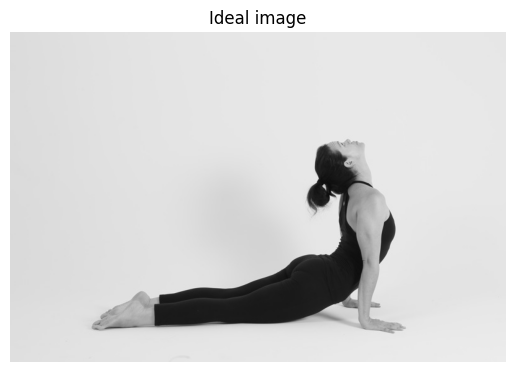

In [55]:
plt.imshow(cv2.cvtColor(ideal_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Ideal image')

In [56]:
ideal_angles = calculate_key_angles(ideal_keypoints)
ideal_angles

{'left_elbow': 140.97116208340904,
 'right_elbow': 166.19745824680945,
 'left_shoulder': 12.264346330110403,
 'right_shoulder': 60.267808487652566,
 'left_hip': 126.61528375627734,
 'right_hip': 116.56483362659418,
 'left_knee': 161.82251219915446,
 'right_knee': 156.6457576105435,
 'left_ankle': 107.894909459021,
 'right_ankle': 109.55923471525716,
 'left_wrist': 108.96924576961057,
 'right_wrist': 104.31734541512886}

In [65]:
user_img = cv2.imread('../data/sun_salutation_poses/test/Bhujangasana/16102003_2564.jpg')

In [66]:
user_keypoints = keypoint_detect(user_img)
user_keypoints

{0: (0.6934539675712585, 0.3290538191795349, -0.1801695078611374),
 1: (0.6787389516830444, 0.34218987822532654, -0.15895895659923553),
 2: (0.678144097328186, 0.3467507064342499, -0.1592680811882019),
 3: (0.6774061322212219, 0.3511340618133545, -0.15921807289123535),
 4: (0.679190993309021, 0.3430942893028259, -0.20643383264541626),
 5: (0.6789339184761047, 0.34830400347709656, -0.20691967010498047),
 6: (0.6784264445304871, 0.35364291071891785, -0.2072446495294571),
 7: (0.6772863268852234, 0.388523668050766, -0.0718020498752594),
 8: (0.6787804365158081, 0.38961517810821533, -0.29178881645202637),
 9: (0.7049238085746765, 0.3445959687232971, -0.1453438550233841),
 10: (0.7065870761871338, 0.3469311594963074, -0.2106868177652359),
 11: (0.6819894313812256, 0.49311012029647827, 0.06842665374279022),
 12: (0.7180606126785278, 0.5063705444335938, -0.3926161825656891),
 13: (0.6832993030548096, 0.6843758225440979, 0.11295830458402634),
 14: (0.7310608625411987, 0.7077423334121704, -0.45

In [67]:
user_angles = calculate_key_angles(user_keypoints)
user_angles

{'left_elbow': 140.97116208340904,
 'right_elbow': 166.19745824680945,
 'left_shoulder': 12.264346330110403,
 'right_shoulder': 60.267808487652566,
 'left_hip': 126.61528375627734,
 'right_hip': 116.56483362659418,
 'left_knee': 161.82251219915446,
 'right_knee': 156.6457576105435,
 'left_ankle': 107.894909459021,
 'right_ankle': 109.55923471525716,
 'left_wrist': 108.96924576961057,
 'right_wrist': 104.31734541512886}

In [68]:
def compare_poses(user_angles, ideal_angles):
    feedback = {}
    for joint, angle in ideal_angles.items():
        threshold = 5
        ideal_angle = ideal_angles.get(joint, None)
        user_angle = user_angles.get(joint, None)
        if ideal_angle is None:
            feedback[joint] = 'Ideal angle not found'
        elif user_angle is None:
            feedback[joint] = 'User angle not found'
        else:
            if abs(ideal_angle - user_angle) <= threshold:
                feedback[joint] = 'Correct'
            else:
                feedback[joint] = 'Incorrect'
    return feedback

In [69]:
user_feedback = compare_poses(user_angles, ideal_angles)
user_feedback

{'left_elbow': 'Correct',
 'right_elbow': 'Correct',
 'left_shoulder': 'Correct',
 'right_shoulder': 'Correct',
 'left_hip': 'Correct',
 'right_hip': 'Correct',
 'left_knee': 'Correct',
 'right_knee': 'Correct',
 'left_ankle': 'Correct',
 'right_ankle': 'Correct',
 'left_wrist': 'Correct',
 'right_wrist': 'Correct'}

In [92]:
def draw_feedback_on_img(user_img, user_feedback, user_keypoints):
    temp_img = user_img.copy()
    for joint_name, angle_status in user_feedback.items():
        joint_index = mp_pose.PoseLandmark[joint_name.upper()].value
        
        if joint_index in user_keypoints:
            x_norm, y_norm, z = user_keypoints[joint_index]
            x = int(x_norm * user_img.shape[1])
            y = int(y_norm * user_img.shape[0])

            color = (0, 255, 0) if angle_status == 'Correct' else (0, 0, 255)

            base_radius = 5
            radius = max(2, int(base_radius * (1 - z)))  
            cv2.circle(temp_img, (x, y), radius, color, -1)
    return temp_img

In [93]:
temp_img = draw_feedback_on_img(user_img, user_feedback, user_keypoints)

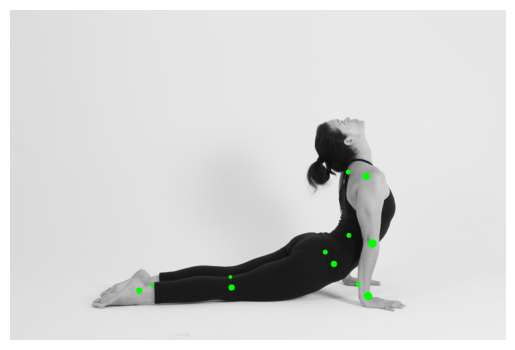

In [94]:
plt.imshow(cv2.cvtColor(temp_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [99]:
test_img = cv2.imread('../data/sun_salutation_poses/test/Bhujangasana/16102003_2562.jpg')

test_keypoints = keypoint_detect(test_img)

test_angles = calculate_key_angles(test_keypoints)

In [100]:
test_feedback = compare_poses(test_angles, ideal_angles)
test_feedback

{'left_elbow': 'Correct',
 'right_elbow': 'Correct',
 'left_shoulder': 'Incorrect',
 'right_shoulder': 'Correct',
 'left_hip': 'Incorrect',
 'right_hip': 'Correct',
 'left_knee': 'Correct',
 'right_knee': 'Correct',
 'left_ankle': 'Incorrect',
 'right_ankle': 'Incorrect',
 'left_wrist': 'Incorrect',
 'right_wrist': 'Correct'}

In [101]:
temp_img2 = draw_feedback_on_img(test_img, test_feedback, test_keypoints)

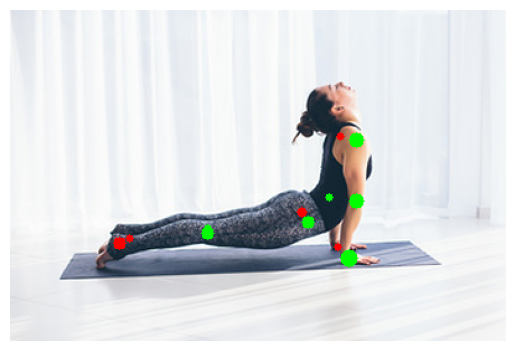

In [102]:
plt.imshow(cv2.cvtColor(temp_img2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()